# Exercise 2

## Imports

In [ ]:
from patterns import letter_templates, flatten, add_noise, plot_pattern, plot_trajectory, unflatten
from hopfield import HopfieldNetwork
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import HTML

# enable JSHTML display for animations
rc('animation', html='jshtml')

## Load and Process Data

In [2]:
templates = letter_templates()
pats = np.stack([flatten(p) for p in templates.values()])

## Training Hopfield Net

In [3]:
net = HopfieldNetwork(dim=25)
net.train(pats)
print("Trained on patterns:", list(templates.keys()))

Trained on patterns: ['J', 'A', 'B', 'P']


## Visualisation

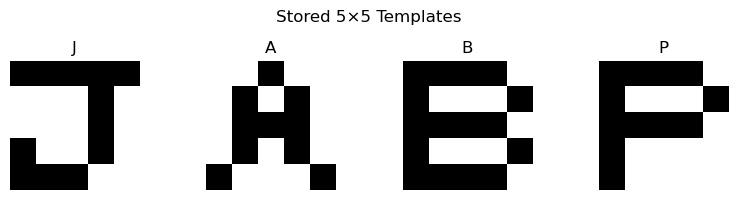

In [4]:
fig, axes = plt.subplots(1, len(templates), figsize=(2*len(templates), 2))
for ax, (letter, pat) in zip(axes, templates.items()):
    ax.imshow(pat, cmap='gray_r', vmin=-1, vmax=1)
    ax.set_title(letter)
    ax.axis('off')
plt.suptitle("Stored 5×5 Templates")
plt.tight_layout()

## Testing With Noise

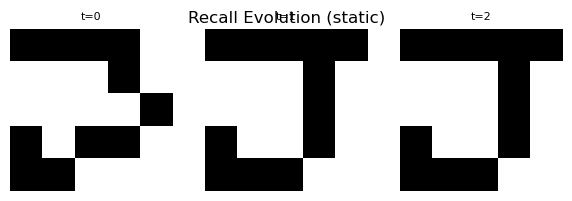

In [5]:
original = pats[0]
noisy = add_noise(original, flip_fraction=0.2)

# run recall
traj = net.recall(noisy, max_iters=10, synchronous=True)

# plot all steps side‐by‐side
fig = net.plot_trajectory(traj)
fig.suptitle("Recall Evolution (static)")
plt.show()

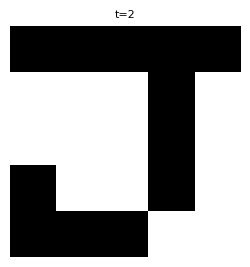

In [6]:
ani = net.animate_trajectory(traj, interval=700)

# display it inline
HTML(ani.to_jshtml())

### Evaluation

NameError: name 'unflatten' is not defined

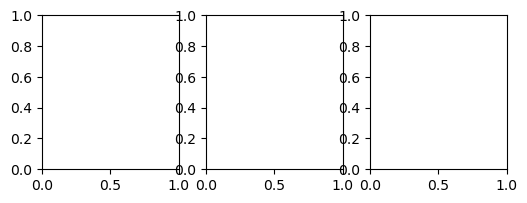

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(6,2))
ax1.imshow(unflatten(original), cmap='gray_r', vmin=-1, vmax=1); ax1.set_title("Original"); ax1.axis('off')
ax2.imshow(unflatten(noisy),    cmap='gray_r', vmin=-1, vmax=1); ax2.set_title("Noisy Input"); ax2.axis('off')
ax3.imshow(unflatten(traj[-1]), cmap='gray_r', vmin=-1, vmax=1); ax3.set_title("Recalled"); ax3.axis('off')
plt.suptitle("Hopfield Recall: Input vs. Output")
plt.tight_layout()

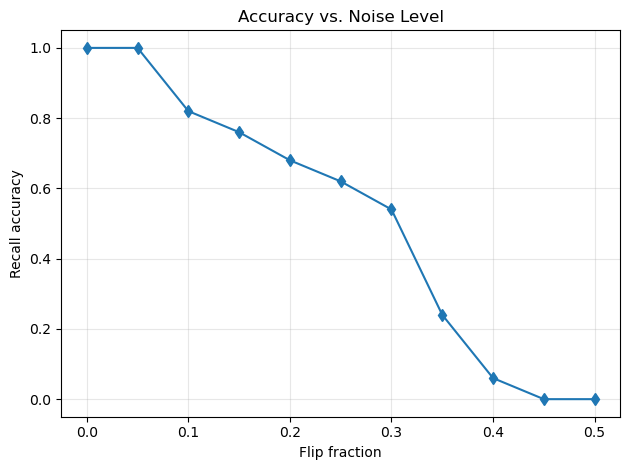

In [8]:
noise_levels = np.linspace(0,0.5,11)
accuracy = []
for p in noise_levels:
    successes = 0
    for _ in range(50):  # repeat trials
        noisy = add_noise(original, p)
        out = net.recall(noisy, max_iters=10)[-1]
        successes += np.array_equal(out, original)
    accuracy.append(successes/50)
plt.plot(noise_levels, accuracy, marker='d')
plt.xlabel("Flip fraction")
plt.ylabel("Recall accuracy")
plt.title("Accuracy vs. Noise Level")
plt.grid(alpha=0.3)
plt.tight_layout()